##Imports


In [ ]:
from google.colab import drive
drive.mount('/content/drive', force_remount=True)
%cd /content/drive/My Drive/ANNDL-24

Mounted at /content/drive
[Errno 2] No such file or directory: '/content/drive/My Drive/ANNDL-24'
/content


In [ ]:
import numpy as np
import tensorflow as tf
from tensorflow import keras as tfk
from tensorflow.keras import layers as tfkl
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
data = np.load("/content/drive/MyDrive/[2024-2025] AN2DL/Homework 1/training_set.npz")
images = data['images']
labels = data['labels']
print(f"images shape: {images.shape} \n")
print(f"labels shape: {labels.shape}")

##Original dataset stats and samples

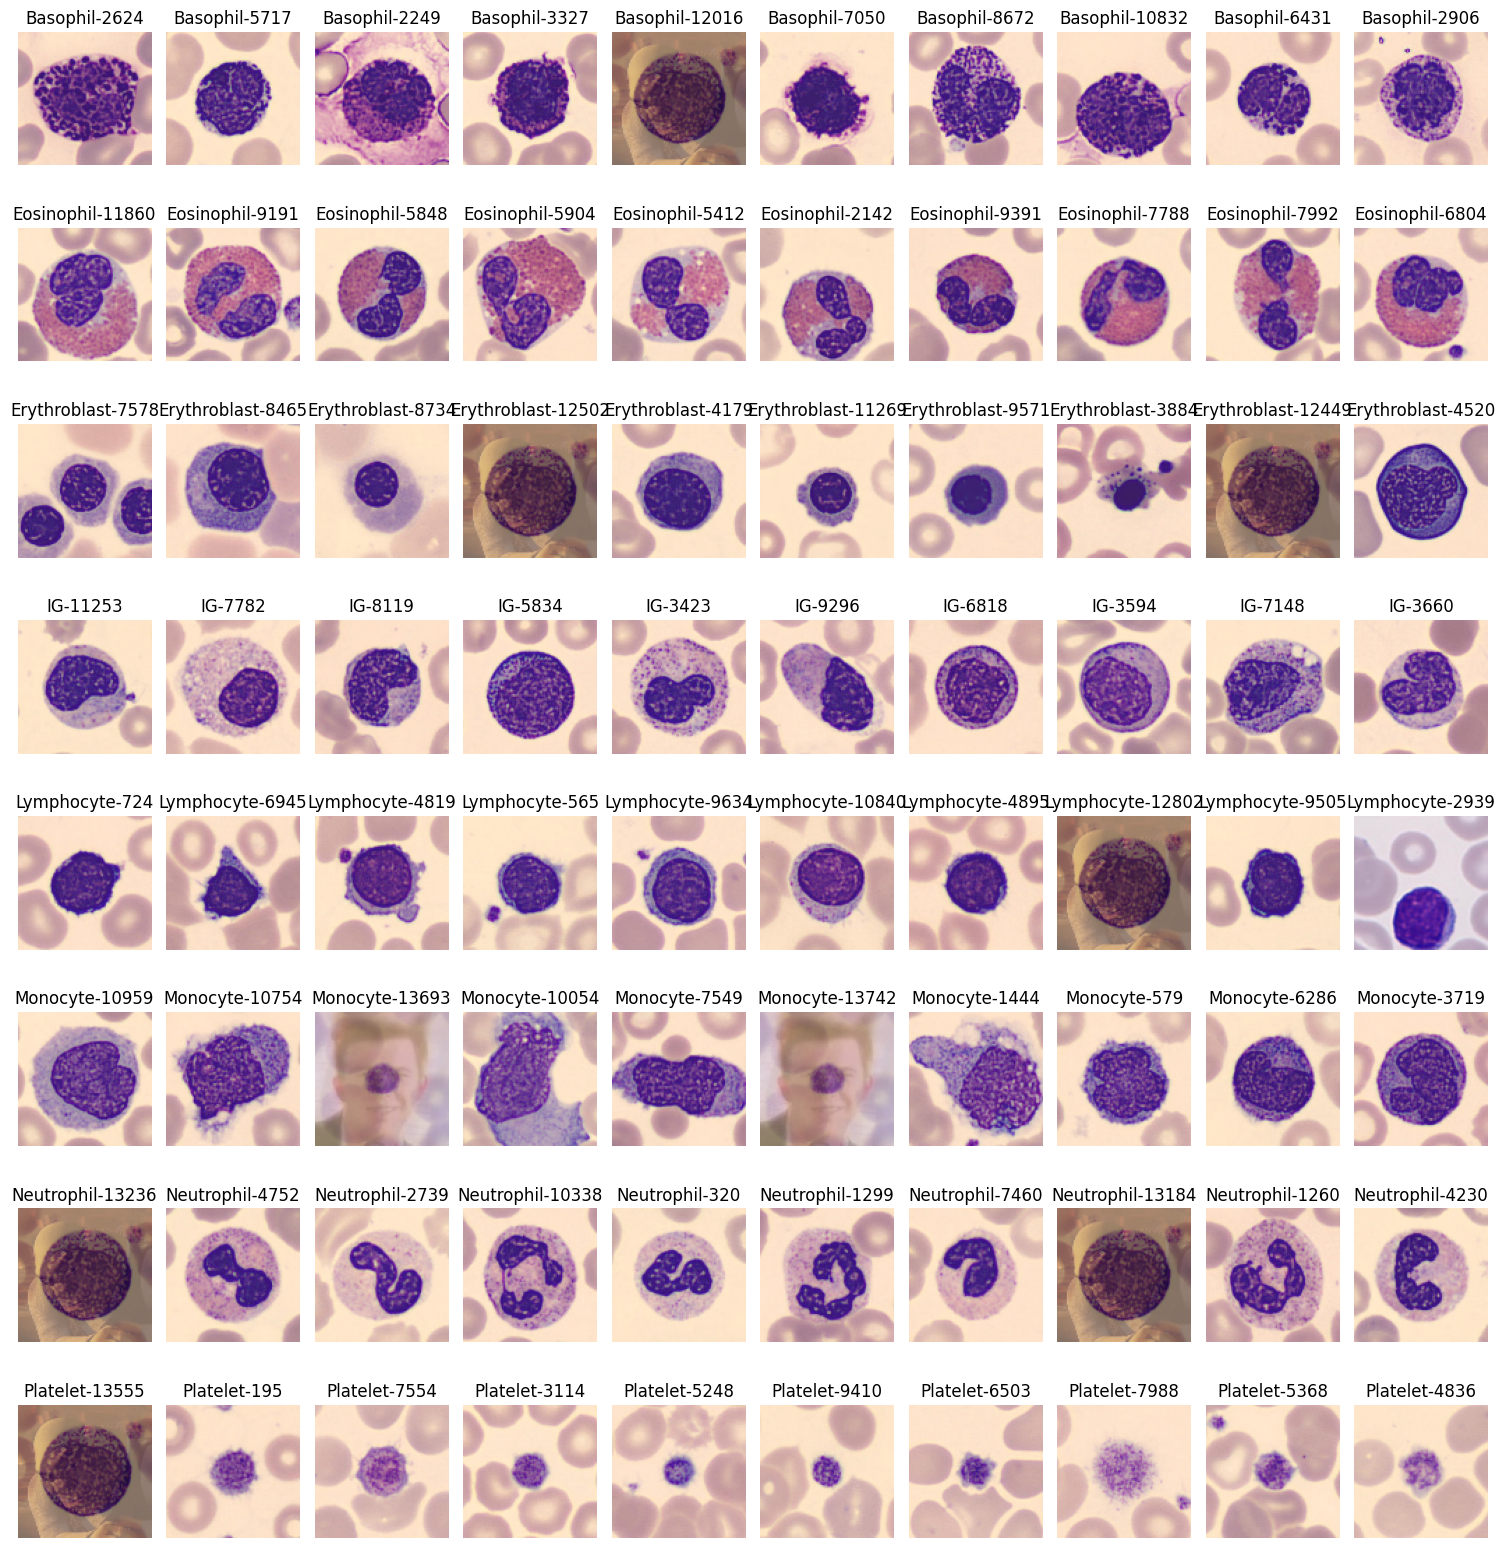

In [ ]:
# Dictionary mapping each label index to its name
label_names = {
    0: "Basophil",
    1: "Eosinophil",
    2: "Erythroblast",
    3: "IG", #Immature granulocyte
    4: "Lymphocyte",
    5: "Monocyte",
    6: "Neutrophil",
    7: "Platelet"
}

# Function to display sample images with label names and indices, with optional randomness
def show_sample_images(images, labels, num_samples=5, random=True, start_index=0):
    unique_labels = np.unique(labels)

    plt.figure(figsize=(15, 2 * len(unique_labels)))

    for i, label in enumerate(unique_labels):
        # Get indices of images with the current label
        label_indices = np.where(labels.flatten() == label)[0]

        if random:
            # Randomly select indices from this label if random is True
            selected_indices = np.random.choice(label_indices, num_samples, replace=False)
        else:
            # Select indices sequentially starting from `start_index` if random is False
            selected_indices = label_indices[start_index:start_index + num_samples]

        for j, idx in enumerate(selected_indices):
            plt.subplot(len(unique_labels), num_samples, i * num_samples + j + 1)
            plt.imshow(images[idx])
            plt.title(f"{label_names[label]}-{idx}")
            plt.axis("off")

    plt.tight_layout()
    plt.show()

# Without randomness, starting at index 10
show_sample_images(images, labels, num_samples=10, random=True)


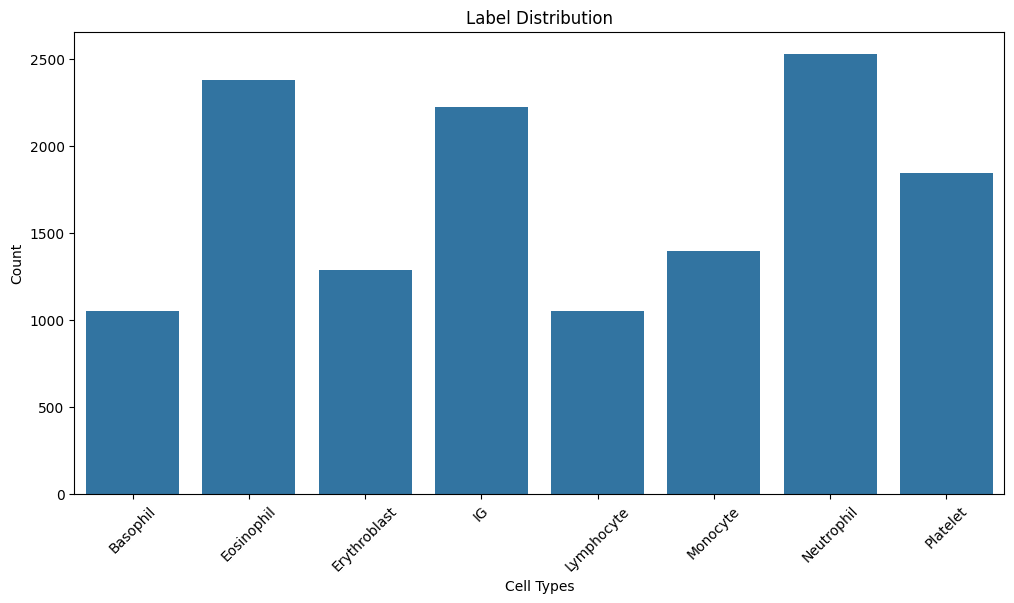

In [ ]:
# Flatten labels and map them to their names
labels_flat = labels.flatten()
labels_named = [label_names[label] for label in labels_flat]

# Plot the label distribution with names
plt.figure(figsize=(12, 6))
sns.countplot(x=labels_named, order=label_names.values())
plt.title("Label Distribution")
plt.xlabel("Cell Types")
plt.ylabel("Count")
plt.xticks(rotation=45)
plt.show()


##Remove outliers RickRoll e Shrek

In [ ]:
import numpy as np

# Define the two images to be removed (assuming they're NumPy arrays)
target_image1 = images[12643]  # Load or define the first repeated image as a NumPy array
target_image2 = images[13609]  # Load or define the second repeated image as a NumPy array

# Find indices of all occurrences of target_image1 and target_image2
indices_to_remove = []

for i in range(len(images)):
    if np.array_equal(images[i], target_image1) or np.array_equal(images[i], target_image2):
        indices_to_remove.append(i)

# Convert indices to a set for efficient removal
indices_to_remove = set(indices_to_remove)

# Filter out the images and labels at these indices
images_filtered = np.array([img for idx, img in enumerate(images) if idx not in indices_to_remove])
labels_filtered = np.array([lbl for idx, lbl in enumerate(labels) if idx not in indices_to_remove])

# Check the new shapes
print("Original images shape:", images.shape)
print("Filtered images shape:", images_filtered.shape)
print("Original labels shape:", labels.shape)
print("Filtered labels shape:", labels_filtered.shape)


Original images shape: (13759, 96, 96, 3)
Filtered images shape: (11959, 96, 96, 3)
Original labels shape: (13759, 1)
Filtered labels shape: (11959, 1)


##Display filtered samples

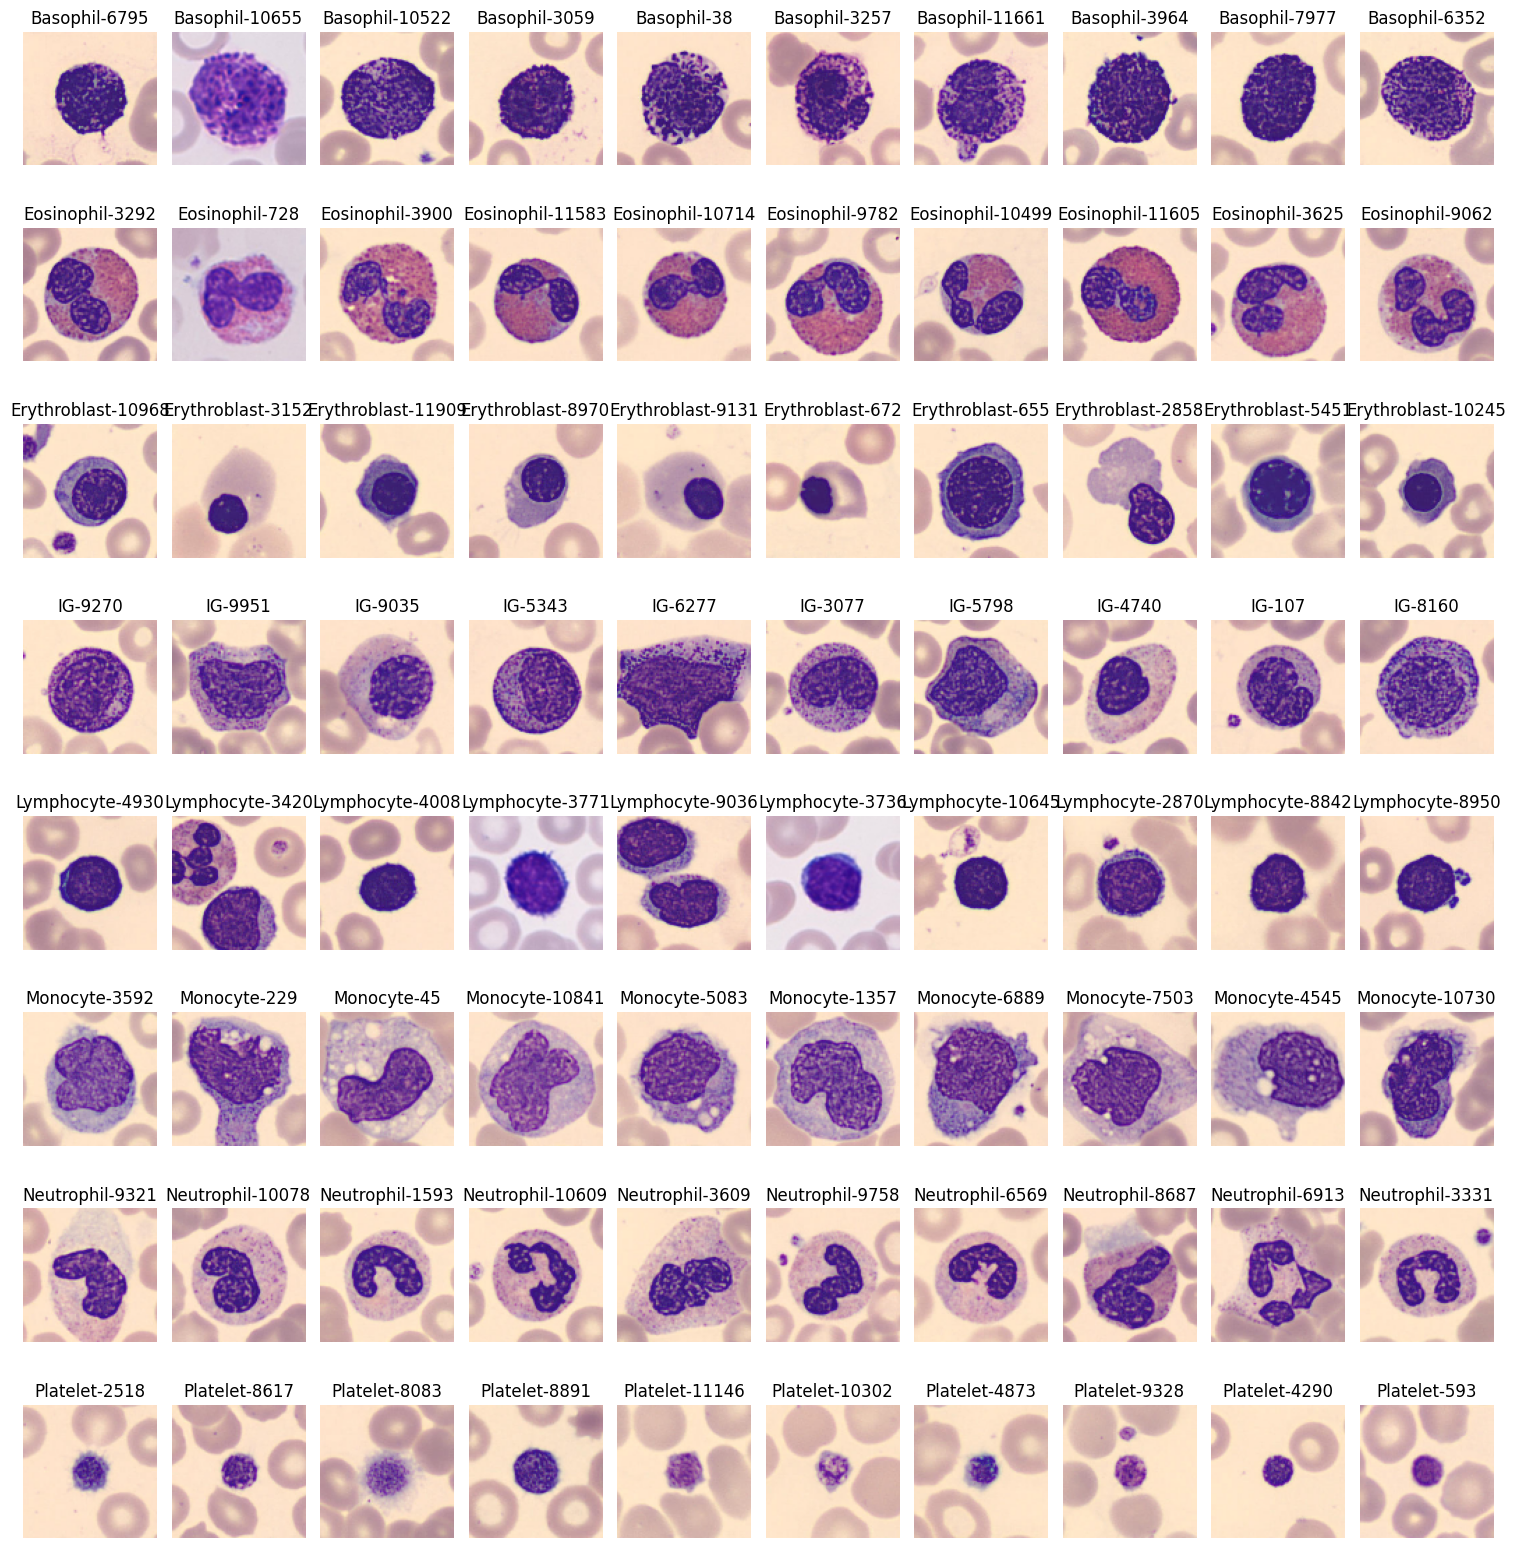

In [ ]:
show_sample_images(images_filtered, labels_filtered, num_samples=10, random=True)

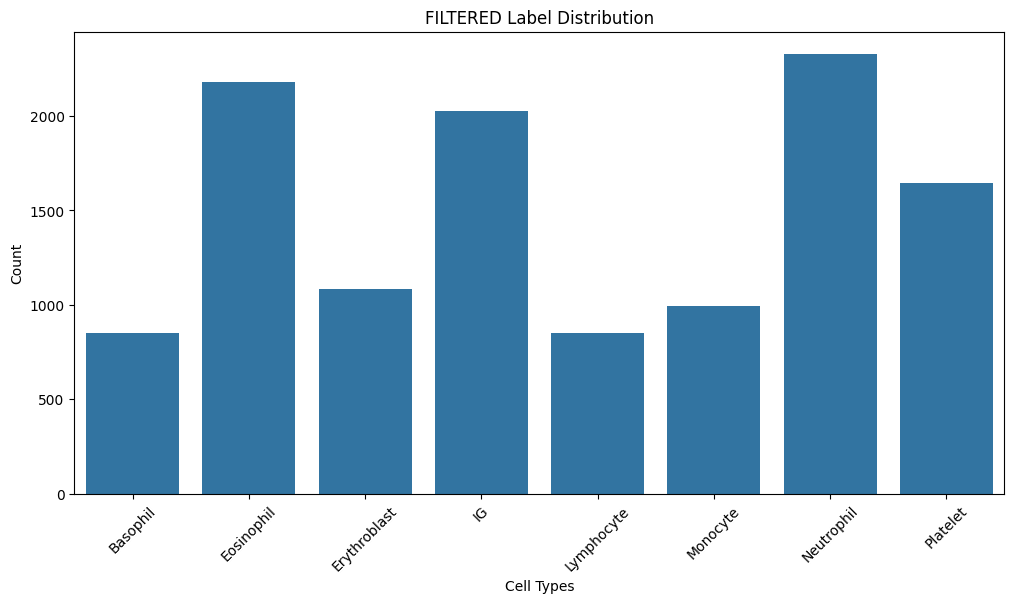

In [ ]:
# Flatten labels and map them to their names
labels_flat = labels_filtered.flatten()
labels_named = [label_names[label] for label in labels_flat]

# Plot the label distribution with names
plt.figure(figsize=(12, 6))
sns.countplot(x=labels_named, order=label_names.values())
plt.title("FILTERED Label Distribution")
plt.xlabel("Cell Types")
plt.ylabel("Count")
plt.xticks(rotation=45)
plt.show()


##Save filtered dataset

In [ ]:
dataset_filtered = {"images": images_filtered, "labels": labels_filtered}
np.savez("/gdrive/MyDrive/NNN_ANNDL/Datasets/dataset_filtered.npz", **dataset_filtered)